# Who eats the food we grow?
### Worldwide food\feed production and distribution, 1961-2013 



By:

#### Durdic Milena
#### Kneringer Paul
#### Petrov Petar
#### Saric Dragana

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.offline import init_notebook_mode, iplot,plot
init_notebook_mode(connected=True)

### First we upload our data set 

In [2]:
food_data = pd.read_csv("food_data.csv",encoding='latin1') 
food_data.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


### Then we change the names of the columns 

In [3]:
food_data=food_data.rename(columns={'Area Code':'area_code','Item Code':'item_code','Element Code':'element_code','Area Abbreviation':'area_abbreviation'})
food_data.shape

(21477, 63)

In [4]:
food_data.head()

,area_abbreviation,area_code,Area,item_code,Item,element_code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


# Then we plot top 10 food production countries

In [5]:
area=food_data['area_abbreviation'].value_counts()[:10]
labels=(np.array(area.index))
value=(np.array((area/area.sum())*100))
trace=go.Pie(labels=labels,values=value)
layout=go.Layout(title='Top 10 countiries ordered by production level')
data=[trace]
fig=go.Figure(data=data,layout=layout)
py.iplot(fig,filename='area')

# And top 10 foods produced around the globe

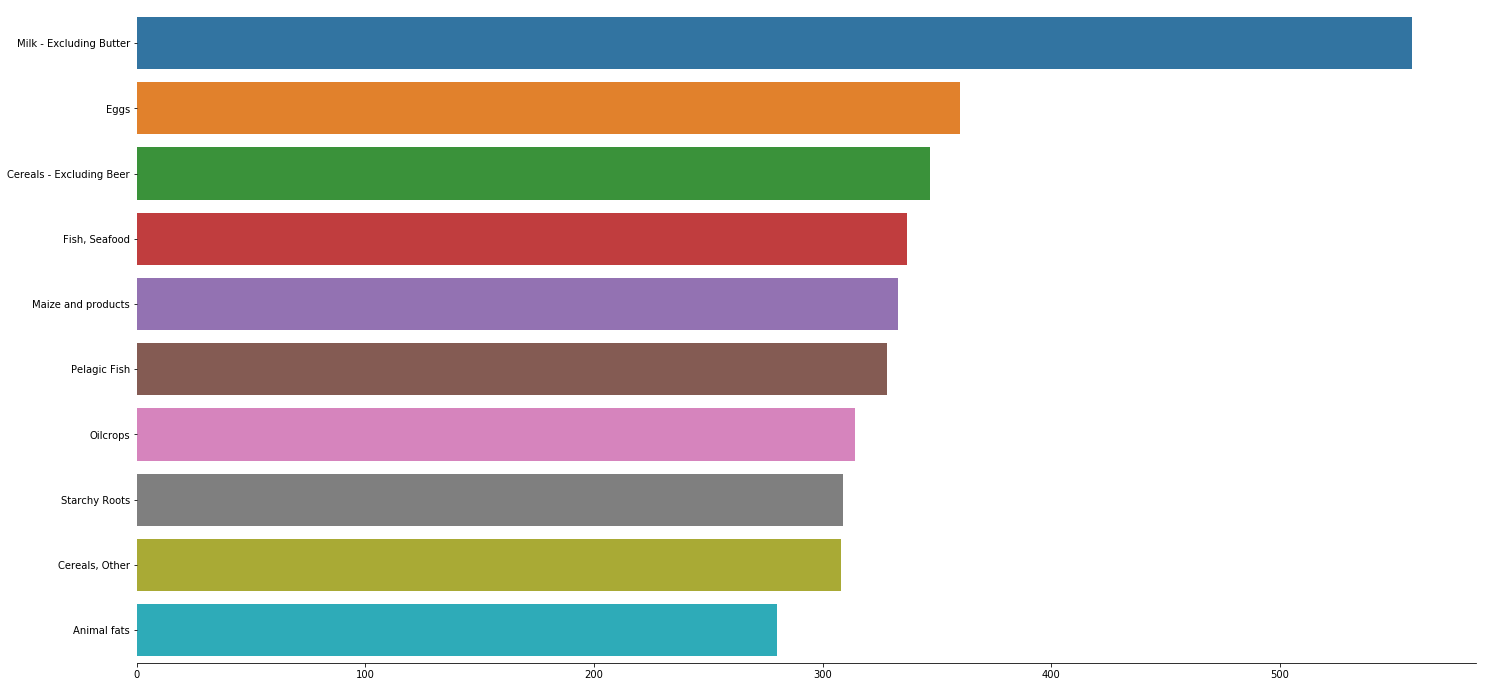

In [6]:
plt.figure(figsize=(24,12))
item=food_data['Item'].value_counts()[:10]
sns.barplot(item.values,item.index)
sns.despine(left=True,right=True)
plt.show()

# We compare feed and food production  

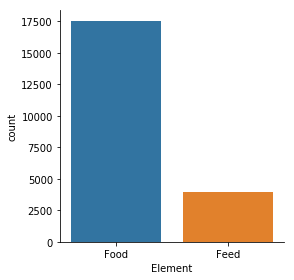

In [7]:
sns.factorplot("Element", data=food_data, kind="count")

# Let's plot total world production in millions of tonnes

In [8]:
years = ['Y' + str(year) for year in range(1961, 2014)]

In [9]:
total_element_by_year = food_data.groupby(by="Element")[years].sum()
total_element_by_year.columns = [y[1:] for y in total_element_by_year.columns]

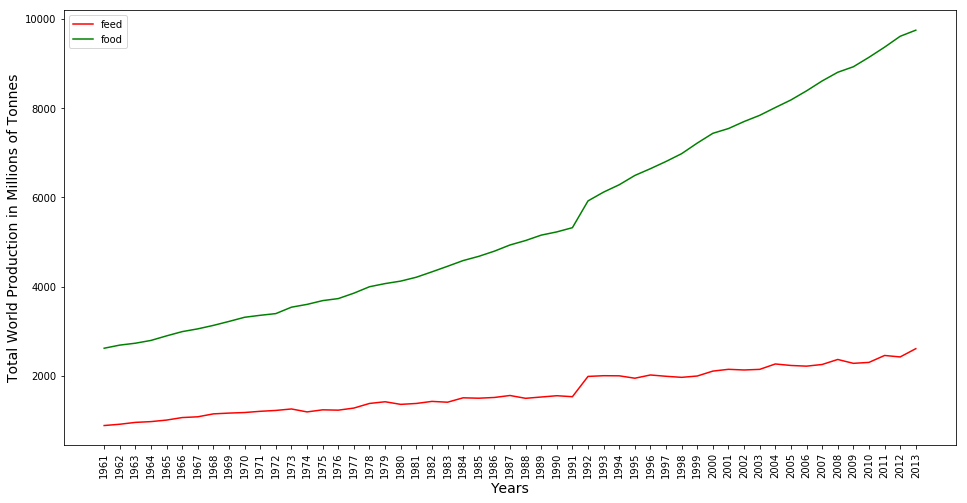

In [10]:
plt.figure(figsize=(16, 8))
plt.plot(total_element_by_year.loc['Feed'] / 1000, label='feed', c='r')
plt.plot(total_element_by_year.loc['Food']  / 1000, label='food', c='g')
plt.xticks(rotation='vertical')
plt.xlabel("Years", fontsize=14)
plt.ylabel("Total World Production in Millions of Tonnes", fontsize=14)
plt.legend(loc='upper left')
plt.show()

# Wait a minute... What happened in the years 1991-1992? 

### To examine, we grouped data by years we are interested in

In [11]:
top_10=food_data.groupby(["area_abbreviation"])[["Y1988","Y1989","Y1990","Y1991","Y1992","Y1993","Y1994","Y1995","Y1996",
                                    "Y1997","Y1998"]].sum()
top=pd.DataFrame(top_10.agg("mean",axis=1).sort_values(ascending=False),columns=["Tonnes"])[:10]

In [12]:
top_10.head()

,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998
area_abbreviation,,,,,,,,,,,
AFG,9406.0,9243.0,9782.0,9638.0,9593.0,10773.0,11347.0,12005.0,12671.0,13525.0,14013.0
AGO,7840.0,8070.0,8163.0,8040.0,8551.0,8408.0,9547.0,10012.0,10394.0,10476.0,11804.0
ALB,3857.0,4155.0,4281.0,4203.0,4715.0,5213.0,6000.0,6101.0,6173.0,5553.0,5701.0
ARE,3428.0,3544.0,3519.0,3663.0,4391.0,4592.0,4782.0,4898.0,4940.0,4945.0,5222.0
ARG,61832.0,59495.0,57052.0,59530.0,65111.0,70104.0,72069.0,70464.0,68941.0,72803.0,74857.0


## H1: Top 10 countries had the significant impact on the production level in years 1991 and 1992

### And printed the production level in year 1991 for top 10 countries

In [13]:
top_10=food_data.groupby(["Area"])[["Y1991"]].sum()

top=pd.DataFrame(top_10.agg("mean",axis=1).sort_values(ascending=False),columns=["Tonnes"])[:10]
top.head(10)

,Tonnes
Area,
"China, mainland",1295563.0
United States of America,830811.0
India,716474.0
Brazil,268171.0
Japan,214289.0
Germany,211866.0
France,176966.0
Italy,152166.0
Nigeria,143524.0


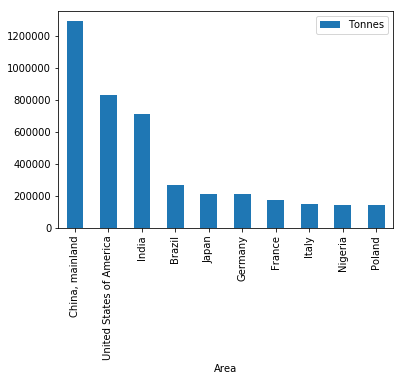

In [14]:
top.plot.bar()

### Now we group and plot data by year 1992

In [15]:
top_1=food_data.groupby(["Area"])[["Y1992"]].sum()

top1992=pd.DataFrame(top_1.agg("mean",axis=1).sort_values(ascending=False),columns=["Tonnes"])[:10]
top1992.head(10)


,Tonnes
Area,
"China, mainland",1379165.0
United States of America,864199.0
India,750584.0
Russian Federation,455486.0
Brazil,277632.0
Japan,216494.0
Germany,211566.0
France,170332.0
Ukraine,157361.0


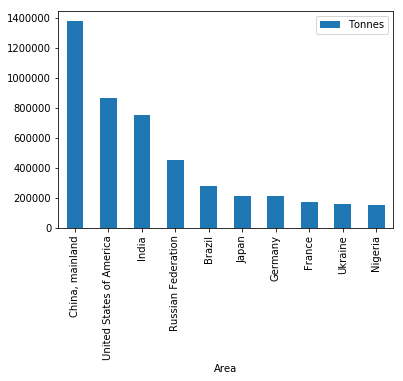

In [16]:
top1992.plot.bar()

# Seems like there is some data missing...

### It's data about communist countries before 1991! Let's upload it!

## H2: The downfall of communisam in Europe had a significant impact on production level increase in years 1991-1992

In [17]:
food_data_comm = pd.read_csv("FAOSTAT_data_5-8-2018.csv",encoding='latin1') 
food_data_comm.head()

,Domain Code,Domain,Country Code,Country,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balance Sheets,228,USSR,5521,Feed,2511,Wheat and products,1961,1961,1000 tonnes,3378,S,Standardized data
1,FBS,Food Balance Sheets,228,USSR,5521,Feed,2511,Wheat and products,1962,1962,1000 tonnes,5000,S,Standardized data
2,FBS,Food Balance Sheets,228,USSR,5521,Feed,2511,Wheat and products,1963,1963,1000 tonnes,5000,S,Standardized data
3,FBS,Food Balance Sheets,228,USSR,5521,Feed,2511,Wheat and products,1964,1964,1000 tonnes,9000,S,Standardized data
4,FBS,Food Balance Sheets,228,USSR,5521,Feed,2511,Wheat and products,1965,1965,1000 tonnes,21000,S,Standardized data


In [18]:
df_comm= pd.DataFrame(food_data_comm)
df_comm.head()

,Domain Code,Domain,Country Code,Country,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balance Sheets,228,USSR,5521,Feed,2511,Wheat and products,1961,1961,1000 tonnes,3378,S,Standardized data
1,FBS,Food Balance Sheets,228,USSR,5521,Feed,2511,Wheat and products,1962,1962,1000 tonnes,5000,S,Standardized data
2,FBS,Food Balance Sheets,228,USSR,5521,Feed,2511,Wheat and products,1963,1963,1000 tonnes,5000,S,Standardized data
3,FBS,Food Balance Sheets,228,USSR,5521,Feed,2511,Wheat and products,1964,1964,1000 tonnes,9000,S,Standardized data
4,FBS,Food Balance Sheets,228,USSR,5521,Feed,2511,Wheat and products,1965,1965,1000 tonnes,21000,S,Standardized data


## We drop unnecessary columns to make the data more understandable 

In [19]:
df_comm=df_comm.drop(['Domain Code','Domain','Country Code','Element Code', 'Item Code','Item','Year Code','Unit', 'Flag',
                     'Flag Description'], axis=1)

### Let's see how to fix this data

In [20]:
is_1961 = df_comm['Year']==1962
df_comm_1961= df_comm[is_1961]

df_comm_1961.head()

,Country,Element,Year,Value
1,USSR,Feed,1962,5000
32,USSR,Food,1962,36800
63,USSR,Food,1962,472
94,USSR,Feed,1962,12000
125,USSR,Food,1962,441


In [21]:
df_comm_1961.groupby(["Year"]).sum(numeric_only=True).sum(axis=1).reset_index()

,Year,0
0,1962,261605


### There we go!

### We want to show yearly data, so we group the data by years

In [22]:
df_comm_full=[]
for k in range(1961,1992):
    is_year = df_comm['Year']==k
    df_comm_current= df_comm[is_year]
    df_comm_current=df_comm_current.groupby(["Year"]).sum(numeric_only=True).sum(axis=1).reset_index()
    df_comm_full.append(df_comm_current)
df_comm_full=pd.concat(df_comm_full,axis=0)
df_comm_full.head()

,Year,0
0,1961,246612
0,1962,261605
0,1963,261060
0,1964,288530
0,1965,312971


### Now we do the same for old data set, production level of non communist states-we drop some uneccesary data and group them by area yearly 

In [23]:
df_by_years_except_comm=food_data.drop(['area_code','item_code','element_code','latitude','longitude'],axis = 1)
df_by_years_except_comm=df_by_years_except_comm.groupby(["Area"]).sum(numeric_only=True).sum(axis=0).reset_index()
df_by_years_except_comm.head()

,index,0
0,Y1961,3502611.0
1,Y1962,3601632.0
2,Y1963,3685624.0
3,Y1964,3765645.0
4,Y1965,3902533.0


In [24]:
df_test=df_by_years_except_comm
df_test['index'] = df_by_years_except_comm['index'].str[1:]

### That was data without communist states, now let's handle them

In [25]:
df_comm_test=df_comm_full
df_comm_test['Year'] = df_comm_full['Year'].astype(str)
df_comm_test.head()

,Year,0
0,1961,246612
0,1962,261605
0,1963,261060
0,1964,288530
0,1965,312971


In [26]:
df_combined = df_test.merge(df_comm_test,how='left', left_on='index', right_on=['Year'])
df_combined.head()

,index,0_x,Year,0_y
0,1961,3502611.0,1961,246612.0
1,1962,3601632.0,1962,261605.0
2,1963,3685624.0,1963,261060.0
3,1964,3765645.0,1964,288530.0
4,1965,3902533.0,1965,312971.0


## Now we have data for both communist and non-communist states!

In [27]:
df_combined=df_combined.rename(index=str,columns={'index':'Years','0_x':'Non_Comm','Year':'asd','0_y':'Comm'})
df_combined=df_combined.drop(['asd'],axis=1)
df_combined.head(35)

,Years,Non_Comm,Comm
0,1961,3502611.0,246612.0
1,1962,3601632.0,261605.0
2,1963,3685624.0,261060.0
3,1964,3765645.0,288530.0
4,1965,3902533.0,312971.0
5,1966,4053790.0,319108.0
6,1967,4133260.0,333779.0
7,1968,4276697.0,354333.0
8,1969,4382988.0,362455.0
9,1970,4489204.0,383211.0


# Let's put them together and plot them!

In [28]:
df_combined_test=df_combined.groupby(["Years"]).sum(numeric_only=True).sum(axis=1).reset_index()
df_combined_test=df_combined_test.rename(index=str,columns={0:'Combined Prod'})
df_combined_test=df_combined_test.set_index('Years')
df_combined_test

,Combined Prod
Years,
1961,3749223.0
1962,3863237.0
1963,3946684.0
1964,4054175.0
1965,4215504.0
1966,4372898.0
1967,4467039.0
1968,4631030.0
1969,4745443.0


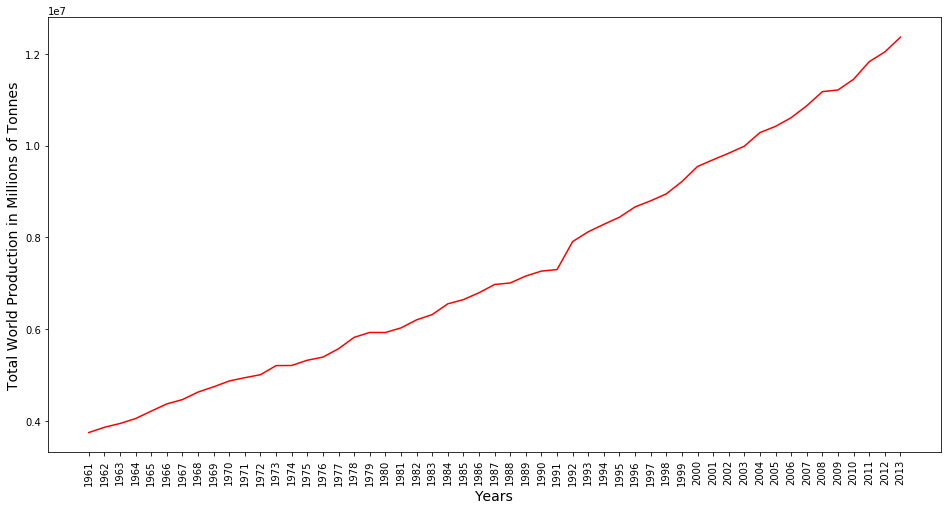

In [29]:
plt.figure(figsize=(16, 8))
plt.plot(df_combined_test, c='r')
plt.xticks(rotation='vertical')
plt.xlabel("Years", fontsize=14)
plt.ylabel("Total World Production in Millions of Tonnes", fontsize=14)
plt.show()

## Now that we have complete data, there is still a steap increase in between the years 1991 and 1992!

# Why? We have a guess!

### Let's see what is the situation with the states from the countries that ceased to exist in the year 1991

In [30]:
new_countries = food_data[food_data.Area.isin(['Armenia', 'Azerbaijan', 'Belarus',"Bosnia and Herzegowina", "Croatia","Estonia","Georgia","Kazakhstan","Kyrgyzstan","Latvia","Lithuania","Republic of Moldova","Russian Federation","Slovenia","Tajikistan","The former Yugoslav Republic of Macedonia","Turkmenistan","Ukraine", "Uzbekistan"])]
new_countries.head()

,area_abbreviation,area_code,Area,item_code,Item,element_code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
679,ARM,1,Armenia,2511,Wheat and products,5521,Feed,1000 tonnes,40.07,45.04,...,69.0,59.0,46.0,67.0,57.0,56.0,61.0,65.0,92,93
680,ARM,1,Armenia,2511,Wheat and products,5142,Food,1000 tonnes,40.07,45.04,...,490.0,433.0,445.0,412.0,428.0,391.0,372.0,386.0,377,389
681,ARM,1,Armenia,2805,Rice (Milled Equivalent),5521,Feed,1000 tonnes,40.07,45.04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
682,ARM,1,Armenia,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,40.07,45.04,...,11.0,14.0,17.0,15.0,13.0,13.0,11.0,9.0,9,9
683,ARM,1,Armenia,2513,Barley and products,5521,Feed,1000 tonnes,40.07,45.04,...,68.0,57.0,33.0,86.0,76.0,102.0,86.0,124.0,121,137


In [31]:
new1991=new_countries.groupby(["Area"])[["Y1991"]].sum()

new1=pd.DataFrame(new1991.agg("mean",axis=1).sort_values(ascending=False),columns=["Tonnes"])[:19]
new1.head(20)

,Tonnes
Area,
Armenia,NaN
Azerbaijan,NaN
Belarus,NaN
Croatia,NaN
Estonia,NaN
Georgia,NaN
Kazakhstan,NaN
Kyrgyzstan,NaN
Latvia,NaN


## OK, those are the ones!

### How did they do in the first year of existance? 

In [32]:
new1992=new_countries.groupby(["Area"])[["Y1992"]].sum()

new2=pd.DataFrame(new1992.agg("mean",axis=1).sort_values(ascending=False),columns=["Tonnes"])[:19]
new2.head(20)

,Tonnes
Area,
Russian Federation,455486.0
Ukraine,157361.0
Belarus,44161.0
Kazakhstan,43816.0
Uzbekistan,32167.0
Republic of Moldova,11521.0
Lithuania,9667.0
Croatia,9525.0
Kyrgyzstan,9041.0


In [33]:
Total_of_new_countries = new2['Tonnes'].sum()
print ("Total production of newly established countries in year 1992 is " +  str(Total_of_new_countries))

Total production of newly established countries in year 1992 is 825346.0


# That's pretty good!

### Before the break-up of these countries the situation was as follows:

In [34]:
is_1991 = df_comm['Year']==1991
df_comm_1991= df_comm[is_1991]

df_comm_1991.head()

,Country,Element,Year,Value
30,USSR,Feed,1991,36000
61,USSR,Food,1991,42962
92,USSR,Food,1991,1590
123,USSR,Feed,1991,42900
154,USSR,Food,1991,198


In [35]:
df_comm_1991.groupby(["Year"]).sum(numeric_only=True).sum(axis=1).reset_index()


,Year,0
0,1991,445135


# There we go!

### All those countries together produces 445 135 millions of tonnes, while separated even 825 346 millions! 

### Now we know that the downfall of communism in Europe caused this steep increase in the world production!

## H1 is rejected as we found no evidence that top 10 countris had a significant impact on production increase in year 1991-1992


## H2 is accepted as the data shows that downfall of communism in Europe had a significant impact on production increase in years 1991-1992

# Thank you for your attention!